<a href="https://colab.research.google.com/github/madelinebro/madelinebro.github.io/blob/main/dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install hydrofunctions package
!pip install hydrofunctions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [143]:
#import hydrofunctions as hf
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
url1 = 'https://waterdata.usgs.gov/nwis/dv?cb_00010=on&cb_00060=on&cb_00065=on&cb_00095=on&cb_00300=on&cb_00400=on&cb_63680=on&format=html&site_no=06892360&legacy=&referred_module=sw&period=&begin_date=2004-02-25&end_date=2024-06-18'

In [ ]:
dfs = pd.read_html(url1, match='Date')

match='Date' tells pandas to look for the table with the Date attribute which is where our table of data begins

In [ ]:
if dfs:
  df = dfs[0]

In [ ]:
print(df.head())
print(df.columns)

         Date  \
0  02/25/2004   
1  02/26/2004   
2  02/27/2004   
3  02/28/2004   
4  02/29/2004   

  Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Minimum)  \
0                                               5.8A                                          
1                                               4.7A                                          
2                                               4.8A                                          
3                                               5.2A                                          
4                                               5.4A                                          

  Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Maximum)  \
0                                               9.2A                                          
1                                               8.6A                                          
2                                        

In [ ]:
specific_columns = df[['Date',
       'Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Minimum)',
       'Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Maximum)',
       'Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Mean)',
       'Gage height,  feet, (Mean)', 'Dis- charge,  ft3/s, (Mean)',
       'Temper-  ature,  water,  deg C, [Discontinued Jan. 9, 2008] (Maximum)',
       'Temper-  ature,  water,  deg C, [Discontinued Jan. 9, 2008] (Minimum)',
       'Temper-  ature,  water,  deg C, [Discontinued Jan. 9, 2008] (Mean)',
       'pH,  water, unfltrd  field,  std  units, [Discontinued Jan. 9, 2008] (Maximum)',
       'pH,  water, unfltrd  field,  std  units, [Discontinued Jan. 9, 2008] (Minimum)',
       'pH,  water, unfltrd  field,  std  units, [Discontinued Jan. 9, 2008] (Median)',
       'Specif-  ic conduc-  tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Maximum)',
       'Specif-  ic conduc-  tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Minimum)',
       'Specif-  ic conduc-  tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Mean)',
       'Dis-  solved oxygen,  mg/L, [Discontinued Jan. 9, 2008] (Maximum)',
       'Dis-  solved oxygen,  mg/L, [Discontinued Jan. 9, 2008] (Minimum)',
       'Dis-  solved oxygen,  mg/L, [Discontinued Jan. 9, 2008] (Mean)']]


In [ ]:
df.to_csv('data.csv', index=True, date_format='%Y-%m-%d')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

convert to date time format

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object (string) type
        df[col] = df[col].str.replace(r'\D', '', regex=True)  # Remove non-digit characters
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        except:
            print(f"Could not convert column {col} to numeric even after removing non-digit characters")


In [ ]:
df = df[df['Date'] <= '2008-01-04']

In [ ]:
del df['Turbid-  ity,  IR LED  light, det ang 90 deg,  FNU, [Discontinued Jan. 9, 2008] (Minimum)']

In [ ]:
df.tail(111)

,Date,"Turbid- ity, IR LED light, det ang 90 deg, FNU, [Discontinued Jan. 9, 2008] (Maximum)","Turbid- ity, IR LED light, det ang 90 deg, FNU, [Discontinued Jan. 9, 2008] (Mean)","Gage height, feet, (Mean)","Dis- charge, ft3/s, (Mean)","Temper- ature, water, deg C, [Discontinued Jan. 9, 2008] (Maximum)","Temper- ature, water, deg C, [Discontinued Jan. 9, 2008] (Minimum)","Temper- ature, water, deg C, [Discontinued Jan. 9, 2008] (Mean)","pH, water, unfltrd field, std units, [Discontinued Jan. 9, 2008] (Maximum)","pH, water, unfltrd field, std units, [Discontinued Jan. 9, 2008] (Minimum)","pH, water, unfltrd field, std units, [Discontinued Jan. 9, 2008] (Median)","Specif- ic conduc- tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Maximum)","Specif- ic conduc- tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Minimum)","Specif- ic conduc- tance, wat unf uS/cm @ 25 degC, [Discontinued Jan. 9, 2008] (Mean)","Dis- solved oxygen, mg/L, [Discontinued Jan. 9, 2008] (Maximum)","Dis- solved oxygen, mg/L, [Discontinued Jan. 9, 2008] (Minimum)","Dis- solved oxygen, mg/L, [Discontinued Jan. 9, 2008] (Mean)"
1299,2007-09-16,310.0,190.0,NaN,61,178.0,167.0,172.0,80.0,79.0,80.0,588.0,580.0,584.0,64.0,56.0,60.0
1300,2007-09-17,260.0,135.0,NaN,60,222.0,176.0,195.0,81.0,79.0,80.0,602.0,587.0,593.0,81.0,53.0,66.0
1301,2007-09-18,340.0,186.0,NaN,94,225.0,201.0,211.0,81.0,78.0,80.0,604.0,560.0,599.0,81.0,60.0,68.0
1302,2007-09-19,250.0,186.0,NaN,274,234.0,206.0,217.0,80.0,78.0,80.0,621.0,594.0,604.0,75.0,52.0,64.0
1303,2007-09-20,180.0,147.0,NaN,275,247.0,221.0,231.0,80.0,79.0,79.0,652.0,621.0,635.0,68.0,56.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,2007-12-31,21.0,16.0,NaN,889,4.0,0.0,2.0,79.0,77.0,78.0,759.0,739.0,753.0,165.0,152.0,159.0
1406,2008-01-01,18.0,15.0,NaN,775,4.0,0.0,2.0,81.0,78.0,79.0,753.0,741.0,749.0,170.0,154.0,161.0
1407,2008-01-02,17.0,15.0,NaN,635,4.0,0.0,2.0,79.0,78.0,78.0,770.0,745.0,758.0,179.0,162.0,169.0
1408,2008-01-03,15.0,13.0,NaN,590,4.0,0.0,2.0,79.0,77.0,77.0,794.0,770.0,787.0,184.0,166.0,174.0


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                                        Date  \
Date                                                1.000000   
Turbid-  ity,  IR LED  light, det ang 90 deg,  ... -0.008015   
Turbid-  ity,  IR LED  light, det ang 90 deg,  ... -0.081896   
Turbid-  ity,  IR LED  light, det ang 90 deg,  ... -0.071729   
Gage height,  feet, (Mean)                         -0.232635   
Dis- charge,  ft3/s, (Mean)                        -0.097876   
Temper-  ature,  water,  deg C, [Discontinued J... -0.056351   
Temper-  ature,  water,  deg C, [Discontinued J... -0.053585   
Temper-  ature,  water,  deg C, [Discontinued J... -0.059562   
pH,  water, unfltrd  field,  std  units, [Disco...  0.083768   
pH,  water, unfltrd  field,  std  units, [Disco...  0.073389   
pH,  water, unfltrd  field,  std  units, [Disco...  0.089800   
Specif-  ic conduc-  tance, wat unf uS/cm @ 25 ...  0.020021   
Specif-  ic conduc-  tance, wat unf uS/cm @ 25 ...  0.050342   
Specif-  ic conduc-  tance, wat unf uS/c

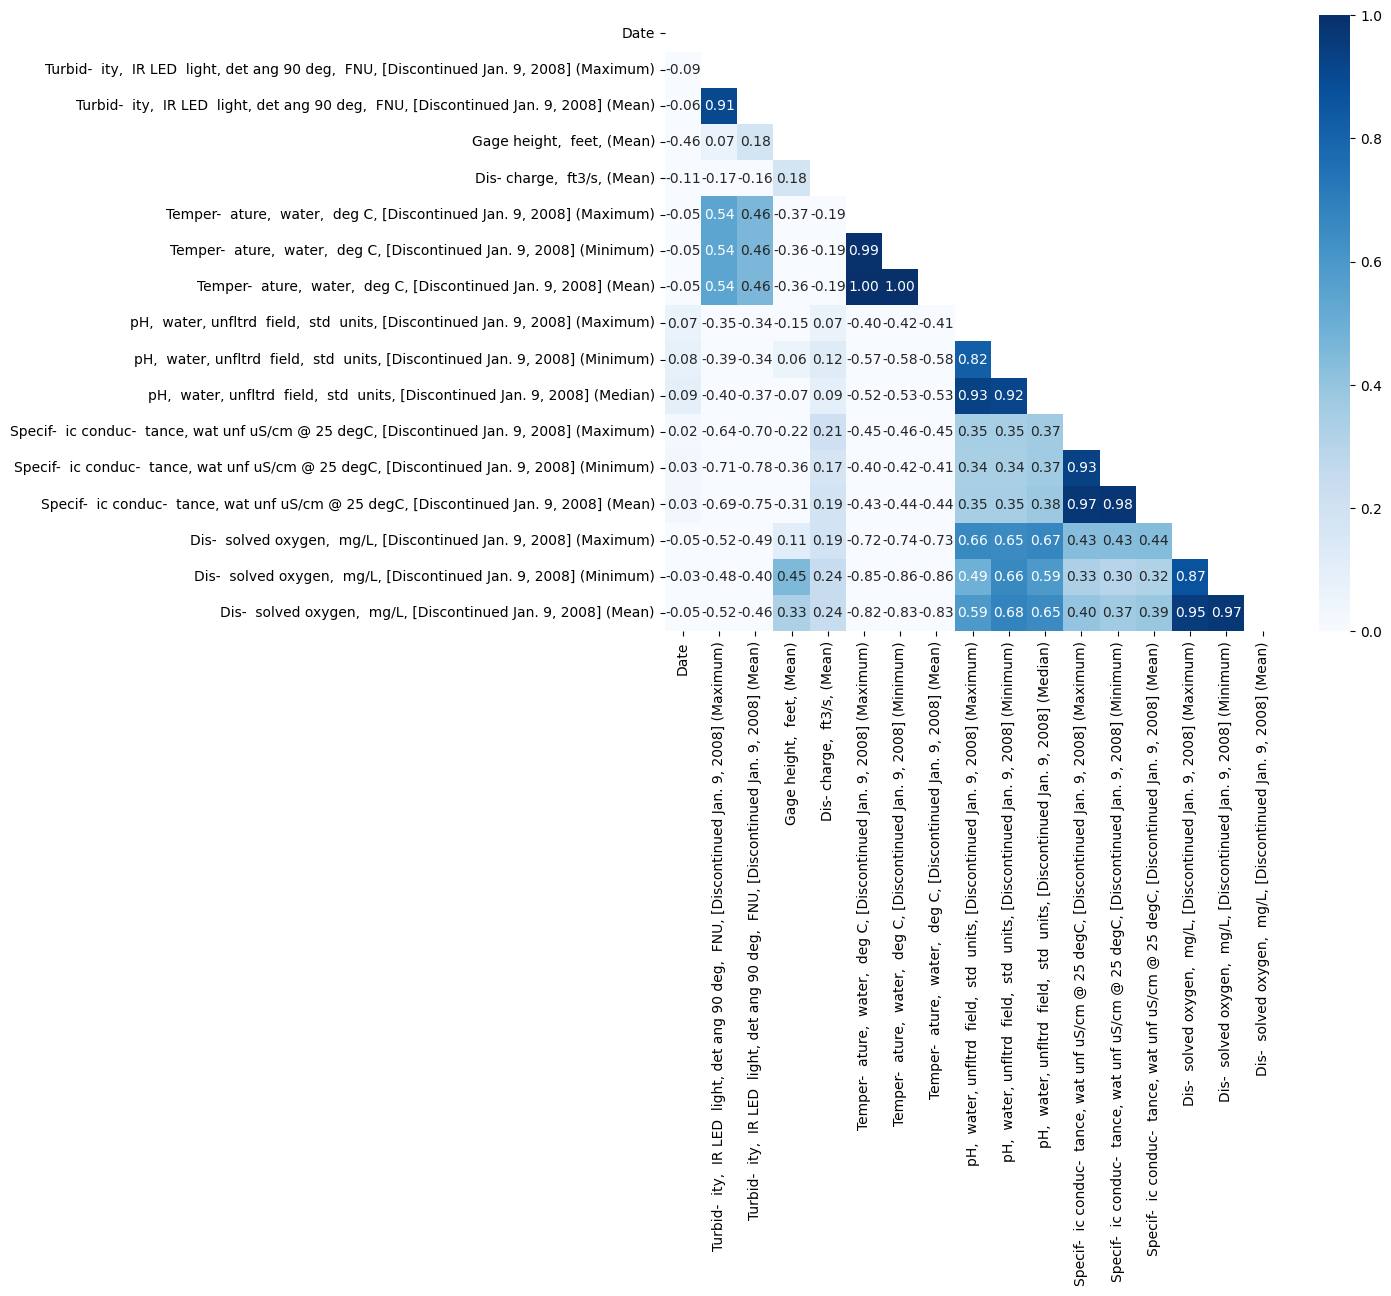

In [145]:
my_matrix = df.corr(method='spearman').round(2)
my_mask = np.triu(np.ones_like(my_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(my_matrix, cmap="Blues", vmin=0, vmax=1, mask=my_mask, annot=True, fmt=".2f", square=True)
plt.show()